In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-dataset/LCDataDictionary.xlsx
/kaggle/input/credit-risk-dataset/loan/loan.csv


**Task 1**: Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/loan/loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [4]:
df.shape

(887379, 74)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [6]:
df.drop(df.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]),axis=1, inplace=True)

In [7]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(4), object(7)
memory usage: 74.5+ MB


In [9]:
df.annual_inc = df.annual_inc.fillna(0)
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dtype: int64

**Creating a Label based on Observations**

In [10]:
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df.loc[:, 'label'] = df['loan_status'].apply(classify_label)
df = df.drop('loan_status', axis=1)

In [11]:
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0

In [12]:
def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

In [13]:
def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

In [14]:
df["grade"] = df["grade"].apply(SC_LabelEncoder1)
df["emp_length"] = df["emp_length"].apply(SC_LabelEncoder2)
df["home_ownership"] = df["home_ownership"].apply(SC_LabelEncoder3)

In [15]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,36 months,10.65,162.87,4,12,1,24000.0,Verified,credit_card,0.0
1,2500.0,60 months,15.27,59.83,3,1,1,30000.0,Source Verified,car,1.0
2,2400.0,36 months,15.96,84.33,3,12,1,12252.0,Not Verified,small_business,0.0
3,10000.0,36 months,13.49,339.31,3,12,1,49200.0,Source Verified,other,0.0
4,3000.0,60 months,12.69,67.79,4,2,1,80000.0,Source Verified,other,0.0
5,5000.0,36 months,7.90,156.46,5,4,1,36000.0,Source Verified,wedding,0.0
6,7000.0,60 months,15.96,170.08,3,9,1,47004.0,Not Verified,debt_consolidation,0.0
7,3000.0,36 months,18.64,109.43,1,10,1,48000.0,Source Verified,car,0.0
8,5600.0,60 months,21.28,152.39,0,5,3,40000.0,Source Verified,small_business,1.0
9,5375.0,60 months,12.69,121.45,4,1,1,15000.0,Verified,other,1.0


In [16]:
df.shape

(887379, 11)

In [17]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
label                  8460
dtype: int64

**Exploring Data Analysis**

Text(0.5, 1.0, 'Term/Verification Status distribution')

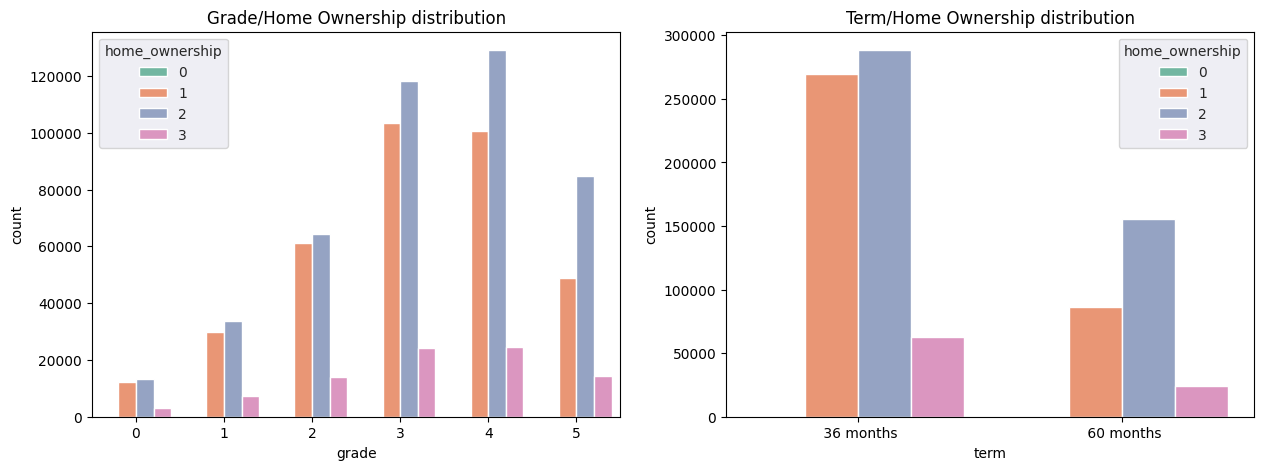

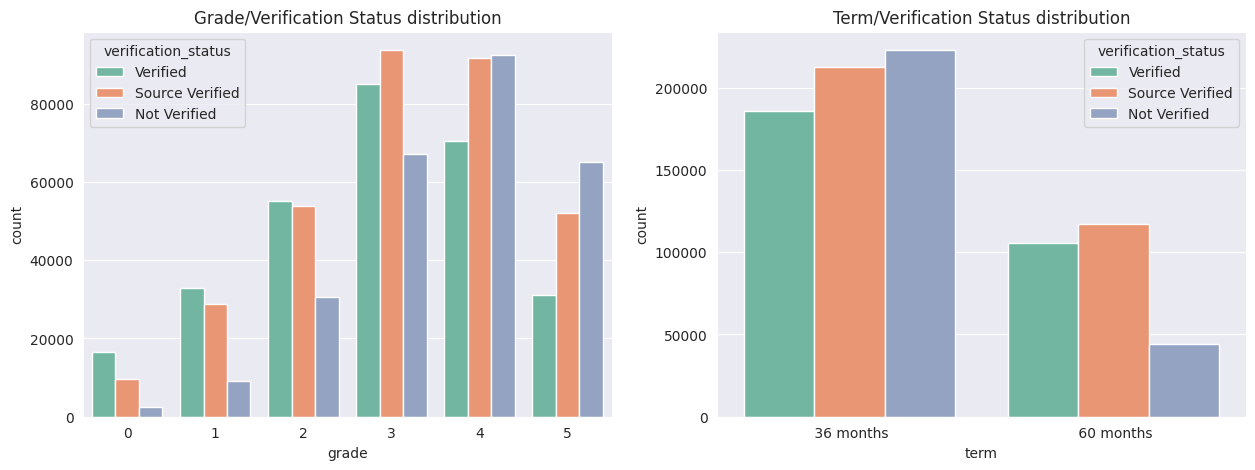

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x = 'grade',hue = 'home_ownership' , ax = ax[0],palette='Set2').set_title("Grade/Home Ownership distribution")
sns.countplot(data=df,x = 'term',hue = 'home_ownership' , ax = ax[1],palette='Set2').set_title("Term/Home Ownership distribution")

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x = 'grade',hue = 'verification_status' , ax = ax[0],palette='Set2').set_title("Grade/Verification Status distribution")
sns.countplot(data=df,x = 'term',hue = 'verification_status' , ax = ax[1],palette='Set2').set_title("Term/Verification Status distribution")

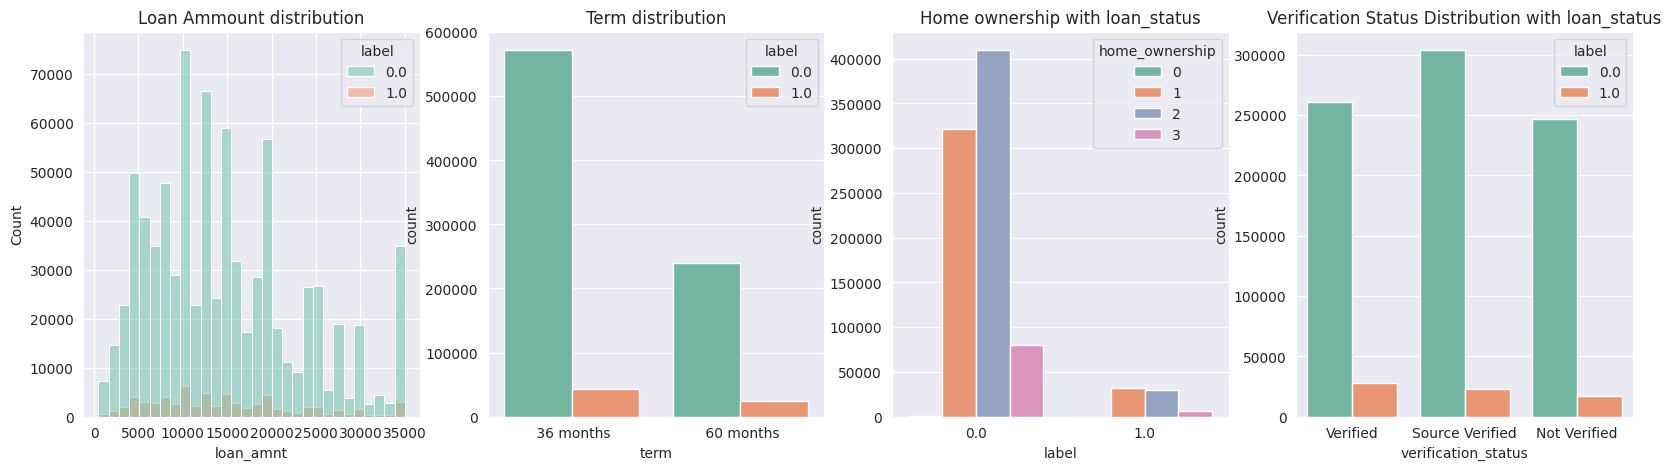

In [19]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.histplot(df, x='loan_amnt',hue="label", bins=30, ax=ax[0],palette='Set2').set_title("Loan Ammount distribution");
sns.countplot(data=df, x='term', hue="label", ax=ax[1],palette='Set2').set_title("Term distribution");
sns.countplot(data=df, hue='home_ownership', x='label', ax=ax[2],palette='Set2').set_title("Home ownership with loan_status");
sns.countplot(data=df, x='verification_status', hue='label', ax=ax[3],palette='Set2').set_title("Verification Status Distribution with loan_status");

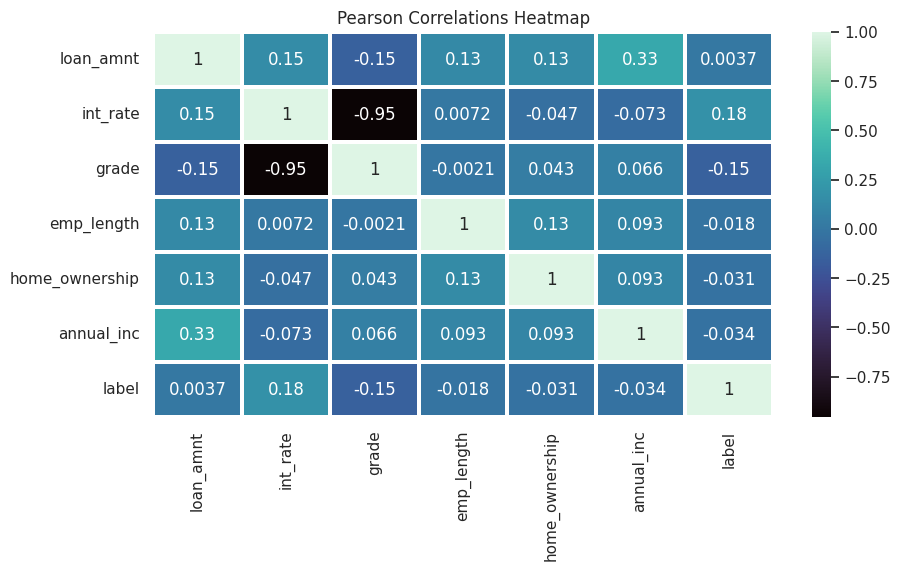

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(df[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','label']].corr(),cbar=True,annot=True,
            linecolor='white',linewidths=1.5,cmap="mako").set_title("Pearson Correlations Heatmap");

**Label Encoding**

In [21]:
from sklearn.preprocessing import LabelEncoder
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [22]:
df.label = df.label.fillna(1)

**Splitting into Testing and Training**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X, y = df.drop("label", axis=1), df["label"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [29]:
acc = []
pre = []
f1 =[]
rec =[]

**Model Evaluation**

K Nearest Neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)

In [32]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
pred_knn = knn.predict(X_test_scaled)

In [34]:
print("Classification Report :")
print(     classification_report(y_test,pred_knn))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    162233
         1.0       0.22      0.00      0.00     15243

    accuracy                           0.91    177476
   macro avg       0.57      0.50      0.48    177476
weighted avg       0.85      0.91      0.87    177476



In [35]:
print("Accuracy = ",accuracy_score(y_test,pred_knn))

Accuracy =  0.9135826816020194


In [36]:
acc.append(accuracy_score(y_test,pred_knn))
pre.append(precision_score(y_test,pred_knn))
rec.append(recall_score(y_test,pred_knn))
f1.append(f1_score(y_test,pred_knn))

Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rftree = RandomForestClassifier(n_estimators=10)

In [39]:
rftree.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=10)

In [40]:
rftree_pred = rftree.predict(X_test_scaled)

In [41]:
print("Classification Report :")
print(classification_report(y_test,rftree_pred))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    162233
         1.0       0.27      0.04      0.06     15243

    accuracy                           0.91    177476
   macro avg       0.59      0.51      0.51    177476
weighted avg       0.86      0.91      0.88    177476



In [42]:
print("Accuracy = ",accuracy_score(y_test,rftree_pred))

Accuracy =  0.9088271090175573


In [43]:
acc.append(accuracy_score(y_test,rftree_pred))
pre.append(precision_score(y_test,rftree_pred))
rec.append(recall_score(y_test,rftree_pred))
f1.append(f1_score(y_test,rftree_pred))

Decision Tree Classification

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [47]:
pred_dtree = dtree.predict(X_test)

In [48]:
print("Classification Report :")
print(classification_report(y_test,pred_dtree))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96    162233
         1.0       0.00      0.00      0.00     15243

    accuracy                           0.91    177476
   macro avg       0.46      0.50      0.48    177476
weighted avg       0.84      0.91      0.87    177476



In [49]:
print("Accuracy = ",accuracy_score(y_test,pred_dtree))

Accuracy =  0.9141123306813316


In [50]:
acc.append(accuracy_score(y_test,pred_dtree))
pre.append(precision_score(y_test,pred_dtree))
rec.append(recall_score(y_test,pred_dtree))
f1.append(f1_score(y_test,pred_dtree))

**Performance Evaluation**

In [51]:
labels = ['KNN','Random Forest','Decision Tree']

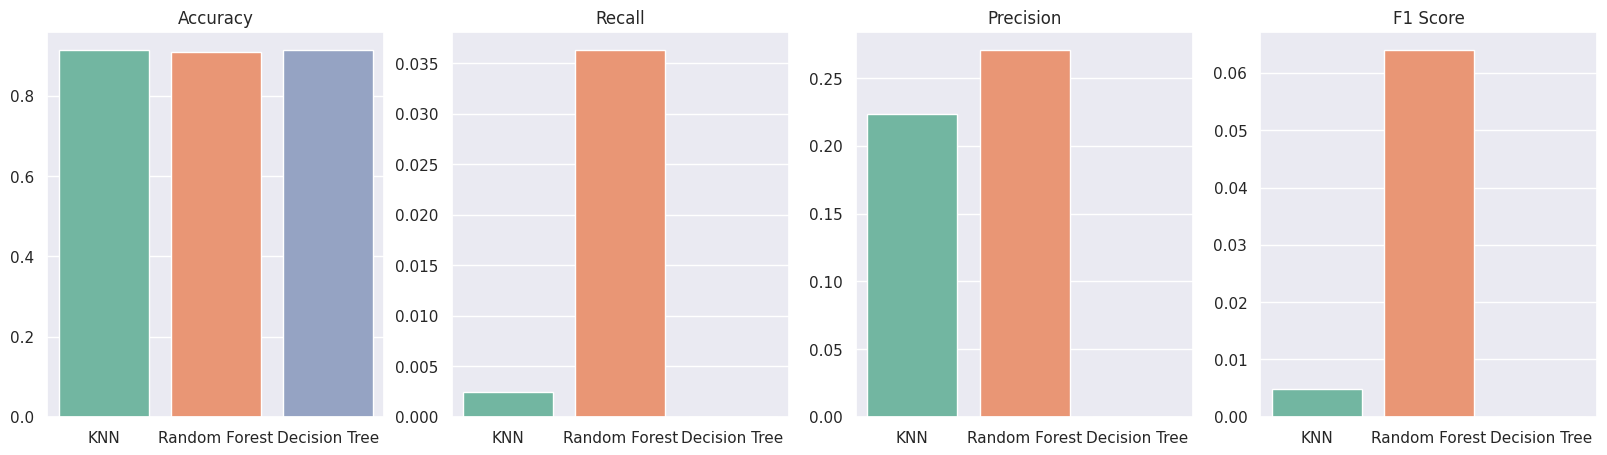

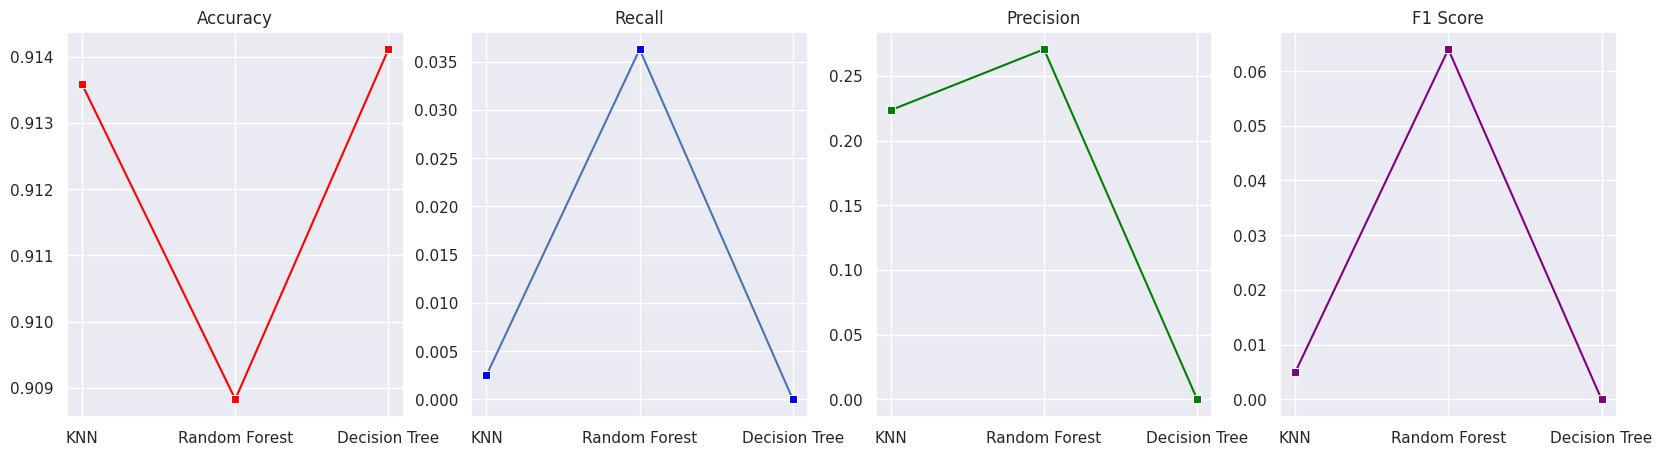

In [52]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.set_style('darkgrid')
sns.barplot(x=labels, y=acc,palette='Set2',ax = ax[0]).set_title("Accuracy");
sns.barplot(x=labels, y=rec,palette='Set2',ax = ax[1]).set_title("Recall");
sns.barplot(x=labels, y=pre,palette='Set2',ax = ax[2]).set_title("Precision");
sns.barplot(x=labels, y=f1,palette='Set2',ax = ax[3]).set_title("F1 Score");

fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.set_style('darkgrid')
sns.lineplot(x=labels, y=acc,palette='Set2',ax = ax[0],marker='s', color='red').set_title("Accuracy");
sns.lineplot(x=labels, y=rec,palette='Set2',ax = ax[1],marker='s', markerfacecolor='blue').set_title("Recall");
sns.lineplot(x=labels, y=pre,palette='Set2',ax = ax[2],marker='s', color='green').set_title("Precision");
sns.lineplot(x=labels, y=f1,palette='Set2',ax = ax[3],marker='s', color='purple').set_title("F1 Score");

In conclusion, the analysis of credit risk predictions using machine learning algorithms, specifically K-Nearest Neighbors (KNN), Random Forest, and Decision Tree, has provided valuable insights into their performance. Through rigorous evaluation and comparison, it is evident that Random Forest emerges as the most effective algorithm among the three for predicting credit risk.